# 逻辑回归

In [2]:
import numpy as np
import matplotlib.pyplot as plt

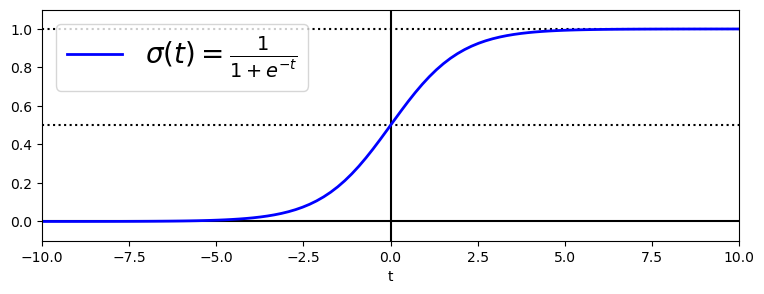

In [8]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## 鸢尾植物数据集

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [15]:
# 训练逻辑回归模型
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

Text(0, 0.5, 'Probability')

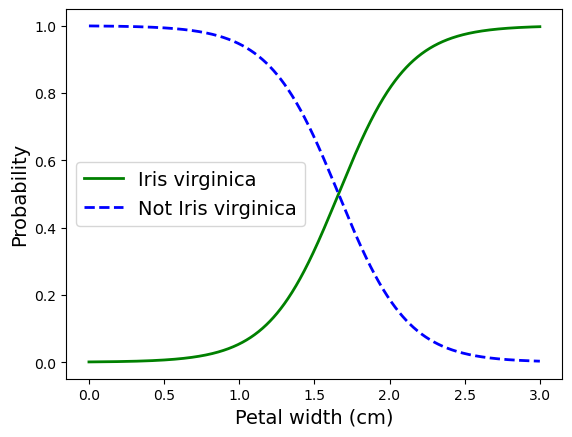

In [28]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend(loc="center left", fontsize=14)
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)

In [39]:
log_reg.predict([[1.7],[1.5],[1.664]])

array([1, 0, 1])

# Softmax回归

In [44]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
softmax_reg  = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

c:\Users\89556\.conda\envs\pydata\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [52]:
softmax_reg.predict([[5,2],[1,1]])

array([2, 0])

In [53]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626371e-07, 5.73689802e-02, 9.42630398e-01]])

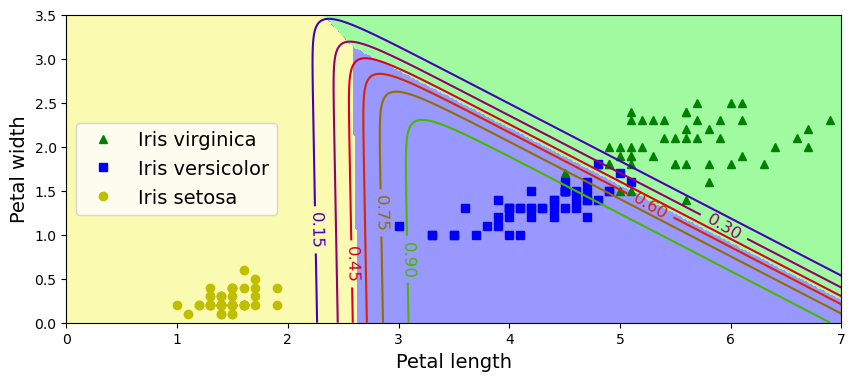

In [56]:
# 创建一个二维网格，用于可视化决策边界
# np.meshgrid生成两个坐标矩阵，x0 和 x1 分别表示 Petal length 和 Petal width 的值范围
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),  # Petal length: 从0到8，生成500个值
    np.linspace(0, 3.5, 200).reshape(-1, 1)  # Petal width: 从0到3.5，生成200个值
)
# 将 x0 和 x1 的数据整合为一个二维数组 X_new，每一行都是一个 (Petal length, Petal width) 对
X_new = np.c_[x0.ravel(), x1.ravel()]  # .ravel() 将网格展平成一维数组
# 使用训练好的 softmax 回归模型对新数据 X_new 进行预测
y_proba = softmax_reg.predict_proba(X_new)  # 预测每个类别的概率
y_predict = softmax_reg.predict(X_new)      # 预测类别
# 将类别 1 的概率（即 Iris versicolor 的概率）重新形状为与网格 x0 相同的形状
zz1 = y_proba[:, 1].reshape(x0.shape)
# 将预测类别结果重新形状为与网格 x0 相同的形状，用于绘制决策边界
zz = y_predict.reshape(x0.shape)
# 创建图形并设置大小
plt.figure(figsize=(10, 4))
# 绘制三种鸢尾花类别的散点图，分别为 Iris virginica、Iris versicolor 和 Iris setosa
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")  # 绿色三角形
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")  # 蓝色方块
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")      # 黄色圆圈
# 定义自定义颜色映射，用于显示背景颜色，表示每个类别的区域
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])  # 定义背景色
# 使用 plt.contourf 绘制决策区域的填充图，表示不同类别的区域
plt.contourf(x0, x1, zz, cmap=custom_cmap)
# 使用 plt.contour 绘制等高线，表示类别 1 (Iris versicolor) 的概率边界
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
# 在等高线上添加标签，标识不同的概率值
plt.clabel(contour, inline=1, fontsize=12)
# 添加横坐标和纵坐标的标签，分别表示 Petal length 和 Petal width
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
# 添加图例，标识三种类别的鸢尾花
plt.legend(loc="center left", fontsize=14)
# 设置坐标轴的范围，Petal length 从 0 到 7，Petal width 从 0 到 3.5
plt.axis([0, 7, 0, 3.5])
# 显示图形
plt.show()